<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/DarkMatter/class_demo_orbital_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
import astropy.io.ascii

In [ ]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

(0.0, 300.0)

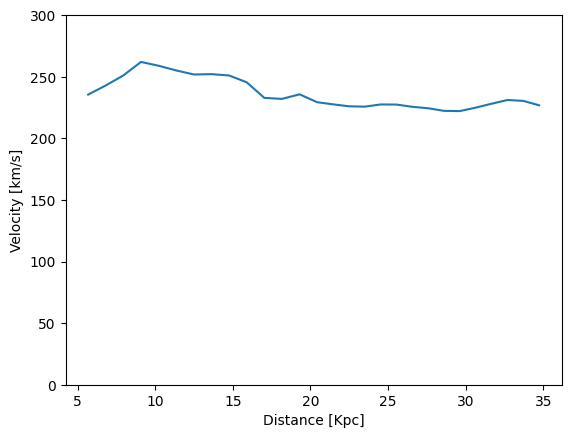

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel)
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [ ]:
print(dis)

 col2
-----
 5.68
 6.81
 7.95
 9.08
10.22
11.35
12.49
13.62
14.76
15.89
  ...
24.52
25.54
26.56
27.58
 28.6
29.62
30.65
31.67
32.69
33.71
34.73
Length = 28 rows


In [ ]:
def calculate_orbital_velocity(mass, radius):
  return(np.sqrt(ac.G * mass / radius))

In [ ]:
mass = 1 * u.earthMass
radius = 1 * u.earthRad
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

7.905388234385281 km / s


In [ ]:
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

4.766142291386287 km / s


In [ ]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
# create a velocity array with the same number of elements as the distance array

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec # what is the difference between rad and radius?
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i] = orb_vel
  # print("The orbital velocity at ", radius, " kpc = ", orb_vel.to(u.km / u.s))

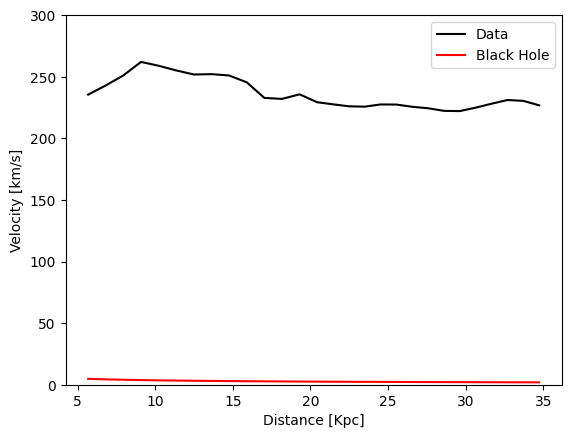

In [ ]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [ ]:
vel_bh[0].value

4.766142291386287